## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

           profitability_ratio
comp_type                     
fmcg                  0.207112
real_est              0.299938
tech                  0.273889
           leverage_ratio
comp_type                
fmcg             4.049784
real_est         7.353476
tech             2.777448


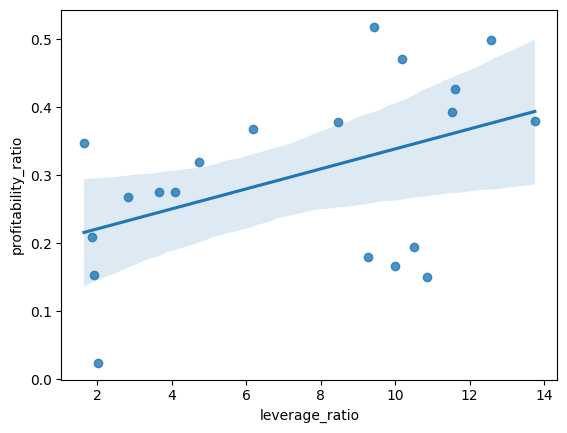

In [4]:
# Read in the files
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")

# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# You only need to compute one profitability ratio, but since there is a choice, we compute both the gross margin ratio and the operating margin ratio 

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio, but commenting it out
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# We only need to compute one leverage ratio, but we also compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"